# Integrantes
Alvarado Delgado Freddy


Moncada Mora Ronald


Mendez Mora Harry


Pintado Litardo Johan


Quinto Martinez Ricardo





**Materia**
Ciencia de Datos

# Profesor
Juan Carlos García

# Curso
8-1 

**Objetivo 13:**Adoptar medidas urgentes para combatir el cambio climático y sus efectos

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
import geopandas

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Datos Clima/DatosClima.csv',skiprows=4,index_col=-1)
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
NaN,Aruba,ABW,Población urbana (% del total),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
NaN,Aruba,ABW,Población urbana,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
NaN,Aruba,ABW,Crecimiento de la población urbana (% anual),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
NaN,Aruba,ABW,"Población, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
NaN,Aruba,ABW,Crecimiento de la población (% anual),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045


In [5]:
def get_years():
  years = []
  for i in range(1960,2022):
    years.append(str(i))
  return years

In [6]:
dt = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
               ,value_vars=get_years(),var_name='Year',value_name='Valor')
dt['Year'] = dt['Year'].astype(int)
dt.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Valor
1243950,Lesotho,LSO,Producción de electricidad a partir de fuentes...,EG.ELC.NGAS.ZS,2021,NaN
1185336,Malawi,MWI,Emisiones de CO2 (kg por PPA del PIB),EN.ATM.CO2E.PP.GD,2018,0.049633
431984,Países pobres muy endeudados (PPME),HPC,Población urbana (% del total),SP.URB.TOTL.IN.ZS,1981,21.261476
949885,"Yemen, Rep. del",YEM,Emisiones de CO2 procedentes del consumo de co...,EN.ATM.CO2E.SF.ZS,2006,0.000000
780482,Oriente Medio y Norte de África (excluido alto...,MNA,Emisiones de CO2 del consumo de combustibles s...,EN.ATM.CO2E.SF.KT,1998,25292.804041
786497,Asia meridional (BIRF y la AIF),TSA,Uso de energía (kg de equivalente de petróleo ...,EG.USE.PCAP.KG.OE,1998,373.560715
360039,África al sur del Sahara (excluido altos ingre...,SSA,Emisiones de gas PFC (miles de toneladas métri...,EN.ATM.PFCG.KT.CE,1977,NaN
30159,Líbano,LBN,Rendimiento de los cereales (kg por hectárea),AG.YLD.CREL.KG,1961,1067.500000
1181351,Italia,ITA,Comunidad de trabajadores de la salud (por cad...,SH.MED.CMHW.P3,2018,NaN
1150442,África al sur del Sahara (BIRF y la AIF),TSS,Emisiones de metano (% de cambio desde 1990),EN.ATM.METH.ZG,2016,NaN


In [7]:
ds = dt[['Country Name', 'Country Code','Indicator Name', 'Indicator Code',
       'Year', 'Valor']]
ds.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Valor
35022,Portugal,PRT,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,1961,NaN
485719,El mundo árabe,ARB,"Población, total",SP.POP.TOTL,1984,1.901621e+08
771582,"Congo, República del",COG,Emisiones de metano (% de cambio desde 1990),EN.ATM.METH.ZG,1998,-5.574213e+00
920089,Países de ingreso bajo,LIC,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.ZG,2005,3.540176e+01
331730,Isla de Man,IMN,Área selvática (% del área de tierra),AG.LND.FRST.ZS,1976,NaN
728687,Samoa Americana,ASM,Tierras agrícolas (kilómetros cuadrados),AG.LND.AGRI.K2,1996,4.660000e+01
1184944,Mongolia,MNG,Emisiones de óxido nitroso (% de cambio desde ...,EN.ATM.NOXE.ZG,2018,NaN
1057132,Francia,FRA,Intensidad de CO2 (kg de uso de energía por kg...,EN.ATM.CO2E.EG.ZS,2012,1.335098e+00
190848,Jamaica,JAM,Promedio grupal de instituciones y gestión del...,IQ.CPA.PUBS.XQ,1969,NaN
423079,Tanzanía,TZA,Rendimiento de los cereales (kg por hectárea),AG.YLD.CREL.KG,1980,1.020200e+03


In [8]:
dt = ds.pivot(index=['Country Name', 'Country Code', 'Year'],columns=['Indicator Name'],values='Valor').reset_index()
dt.sample(10)

Indicator Name,Country Name,Country Code,Year,Acceso a la electricidad (% de población),"Agricultura, valor agregado (% del PIB)",Comunidad de trabajadores de la salud (por cada 1.000 personas),Consumo de energía eléctrica (kWh per cápita),Consumo de energía renovable (% del consumo total de energía final),Crecimiento de la población (% anual),Crecimiento de la población urbana (% anual),...,Área de tierra rural donde la elevación es inferior a 5 metros (% de la superficie total),Área de tierra rural donde la elevación es inferior a 5 metros (kilómetros cuadrados),Área de tierra urbana donde la elevación es inferior a 5 metros (% de la superficie total),Área de tierra urbana donde la elevación es inferior a 5 metros (kilómetros cuadrados),Área selvática (kilómetros cuadrados),Área selvática (% del área de tierra),Áreas marinas protegidas (% de las aguas territoriales),Áreas protegidas terrestres y marinas (% del total de la superficie territorial),Áreas terrestres protegidas (% del área total de la tierra),Índice de facilidad para hacer negocios (1 = reglamentaciones más favorables para los negocios)
13128,Saint Kitts y Nevis,KNA,2006,96.802521,1.188560,NaN,NaN,0.01,0.318380,-0.127044,...,NaN,NaN,NaN,NaN,110.0,42.307692,NaN,NaN,NaN,NaN
3787,Cuba,CUB,1965,NaN,NaN,NaN,NaN,NaN,2.071028,2.386676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7527,Islas Feroe,FRO,1985,NaN,NaN,NaN,NaN,NaN,0.970132,0.701355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11657,Países de ingreso bajo,LIC,1961,NaN,NaN,NaN,NaN,NaN,2.340984,5.027730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14004,Sri Lanka,LKA,2014,92.660515,8.080708,NaN,531.090577,57.31,0.933208,1.043057,...,NaN,NaN,NaN,NaN,21237.8,33.866688,NaN,NaN,NaN,NaN
12144,Polonia,POL,2014,100.000000,2.993028,NaN,3971.799761,11.58,-0.074846,-0.283228,...,NaN,NaN,NaN,NaN,94018.0,30.705771,NaN,NaN,NaN,NaN
11005,Omán,OMN,1991,100.000000,2.632544,NaN,2152.821859,0.00,4.902067,7.432526,...,NaN,NaN,NaN,NaN,30.0,0.009693,NaN,NaN,NaN,NaN
9879,Miembros OCDE,OED,1981,NaN,NaN,NaN,5283.795954,NaN,0.902480,1.340704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14729,Timor-Leste,TLS,1995,NaN,NaN,NaN,NaN,NaN,1.489383,2.987233,...,NaN,NaN,NaN,NaN,9561.0,64.297243,NaN,NaN,NaN,NaN
15079,Tuvalu,TUV,1973,NaN,NaN,NaN,NaN,NaN,0.727276,3.824829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpieza de los datos

In [10]:
dt.fillna(0.,inplace=True)
dt.sample(10)

Indicator Name,Country Name,Country Code,Year,Acceso a la electricidad (% de población),"Agricultura, valor agregado (% del PIB)",Comunidad de trabajadores de la salud (por cada 1.000 personas),Consumo de energía eléctrica (kWh per cápita),Consumo de energía renovable (% del consumo total de energía final),Crecimiento de la población (% anual),Crecimiento de la población urbana (% anual),...,Área de tierra rural donde la elevación es inferior a 5 metros (% de la superficie total),Área de tierra rural donde la elevación es inferior a 5 metros (kilómetros cuadrados),Área de tierra urbana donde la elevación es inferior a 5 metros (% de la superficie total),Área de tierra urbana donde la elevación es inferior a 5 metros (kilómetros cuadrados),Área selvática (kilómetros cuadrados),Área selvática (% del área de tierra),Áreas marinas protegidas (% de las aguas territoriales),Áreas protegidas terrestres y marinas (% del total de la superficie territorial),Áreas terrestres protegidas (% del área total de la tierra),Índice de facilidad para hacer negocios (1 = reglamentaciones más favorables para los negocios)
15242,Ucrania,UKR,2012,99.867493,7.761312,0.0,3640.553483,2.860000,-0.246976,-0.111675,...,0.0,0.0,0.0,0.0,95916.000,16.556653,0.000000,0.000000,0.000000,0.0
991,Argentina,ARG,2021,0.000000,7.131541,0.0,0.000000,0.000000,0.947491,1.075515,...,0.0,0.0,0.0,0.0,0.000,0.000000,11.766525,9.397976,8.476902,0.0
9453,Malta,MLT,1989,0.000000,3.427711,0.0,2851.261113,0.000000,0.973295,1.104061,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0
14857,Tonga,TON,1999,84.828842,22.384070,0.0,0.000000,1.031879,0.628552,0.757985,...,0.0,0.0,0.0,0.0,89.500,12.430556,0.000000,0.000000,0.000000,0.0
13946,Somalia,SOM,2018,50.764977,0.000000,0.0,0.000000,94.930000,3.613059,4.911172,...,0.0,0.0,0.0,0.0,61335.000,9.776995,0.000000,0.000000,0.000000,0.0
10279,México,MEX,2009,98.198212,3.241494,0.0,2020.712795,9.170000,1.236744,1.621902,...,0.0,0.0,0.0,0.0,670871.140,34.510720,0.000000,0.000000,0.000000,0.0
1710,Bahamas,BHS,1996,100.000000,2.646911,0.0,0.000000,0.000000,1.779738,2.049996,...,0.0,0.0,0.0,0.0,5098.600,50.935065,0.000000,0.000000,0.000000,0.0
8301,Kazajstán,KAZ,2015,100.000000,4.710547,0.0,0.000000,1.720000,1.461485,1.589203,...,0.0,0.0,0.0,0.0,33084.562,1.225490,0.000000,0.000000,0.000000,0.0
13912,Somalia,SOM,1984,0.000000,65.132705,0.0,0.000000,0.000000,3.621167,4.571529,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0
13561,Senegal,SEN,2005,47.099998,15.180396,0.0,161.927353,40.320000,2.541264,3.524171,...,0.0,0.0,0.0,0.0,86606.600,44.983431,0.000000,0.000000,0.000000,0.0


# A continuación el análisis exploratorio

In [11]:
dt.columns

Index(['Country Name', 'Country Code', 'Year',
       'Acceso a la electricidad (% de población)',
       'Agricultura, valor agregado (% del PIB)',
       'Comunidad de trabajadores de la salud (por cada 1.000 personas)',
       'Consumo de energía eléctrica (kWh per cápita)',
       'Consumo de energía renovable (% del consumo total de energía final)',
       'Crecimiento de la población (% anual)',
       'Crecimiento de la población urbana (% anual)',
       'Emisiones de CO2 (kg por PPA del PIB)',
       'Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011)',
       'Emisiones de CO2 (kg por US$ del PIB de 2010)',
       'Emisiones de CO2 (kt)',
       'Emisiones de CO2 (toneladas métricas per cápita)',
       'Emisiones de CO2 del consumo de combustible gaseoso (% del total)',
       'Emisiones de CO2 del consumo de combustible gaseoso (kilotoneladas)',
       'Emisiones de CO2 del consumo de combustible líquido (% del total)',
       'Emisiones de CO2 del

In [12]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 79 columns):
 #   Column                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                  --------------  -----  
 0   Country Name                                                                                                                                                                            16492 non-null  object 
 1   Country Code                                                                                                                                                                            16492 non-null  object 
 2   Year                              

In [13]:
dt.describe()

Indicator Name,Year,Acceso a la electricidad (% de población),"Agricultura, valor agregado (% del PIB)",Comunidad de trabajadores de la salud (por cada 1.000 personas),Consumo de energía eléctrica (kWh per cápita),Consumo de energía renovable (% del consumo total de energía final),Crecimiento de la población (% anual),Crecimiento de la población urbana (% anual),Emisiones de CO2 (kg por PPA del PIB),Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011),...,Área de tierra rural donde la elevación es inferior a 5 metros (% de la superficie total),Área de tierra rural donde la elevación es inferior a 5 metros (kilómetros cuadrados),Área de tierra urbana donde la elevación es inferior a 5 metros (% de la superficie total),Área de tierra urbana donde la elevación es inferior a 5 metros (kilómetros cuadrados),Área selvática (kilómetros cuadrados),Área selvática (% del área de tierra),Áreas marinas protegidas (% de las aguas territoriales),Áreas protegidas terrestres y marinas (% del total de la superficie territorial),Áreas terrestres protegidas (% del área total de la tierra),Índice de facilidad para hacer negocios (1 = reglamentaciones más favorables para los negocios)
count,16492.000000,16492.000000,16492.000000,16492.000000,16492.000000,16492.000000,16492.000000,16492.000000,16492.000000,16492.000000,...,16492.000000,1.649200e+04,16492.000000,16492.000000,1.649200e+04,16492.000000,16492.000000,16492.000000,16492.000000,16492.000000
mean,1990.500000,34.670521,10.022231,0.005774,1363.112787,14.132810,1.727915,2.825333,0.137713,0.107046,...,0.241075,2.409194e+03,0.041929,180.833583,7.950953e+05,15.581621,0.618741,1.221932,1.545902,1.099321
std,17.896073,44.179491,13.316853,0.071285,3166.631082,25.461434,1.656293,2.854153,0.249090,0.186608,...,2.831489,3.482896e+04,0.899370,2958.317580,3.503337e+06,22.912640,5.009323,6.001315,6.061663,11.769261
min,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-27.722225,-189.743417,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.706958,1.114566,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1990.500000,0.000000,3.749099,0.000000,0.000000,0.000000,1.713101,2.656156,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2006.000000,94.612366,16.806718,0.000000,1164.661999,16.599452,2.610371,4.156057,0.220121,0.181013,...,0.000000,0.000000e+00,0.000000,0.000000,3.329489e+04,29.928538,0.000000,0.000000,0.000000,0.000000
max,2021.000000,100.000000,89.414510,3.654000,54799.174708,98.340000,20.473239,52.476419,2.382059,2.085052,...,80.680185,1.332306e+06,47.061502,113659.378128,4.128269e+07,98.574551,100.000000,99.957456,62.500000,190.000000


# Análisis Correlacional

In [14]:
header = 'Análisis Correlacional'
def clima(dt, size = (60,60)):
  plt.figure(figsize=size,facecolor=('xkcd:green')) 
  hm = sns.heatmap(dt.corr().round(2), vmin=-1, vmax=1, annot=True)
  hm.set_title('Mapa de Calor'+header, fontdict={'fontsize':20}, pad=12)

In [17]:
Variable=dt[['Crecimiento de la población urbana (% anual)','Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011)','Year']]

In [18]:
Variable.corr()

Indicator Name,Crecimiento de la población urbana (% anual),Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011),Year
Indicator Name,,,
Crecimiento de la población urbana (% anual),1.000000,-0.171572,-0.248759
Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011),-0.171572,1.000000,0.425216
Year,-0.248759,0.425216,1.000000


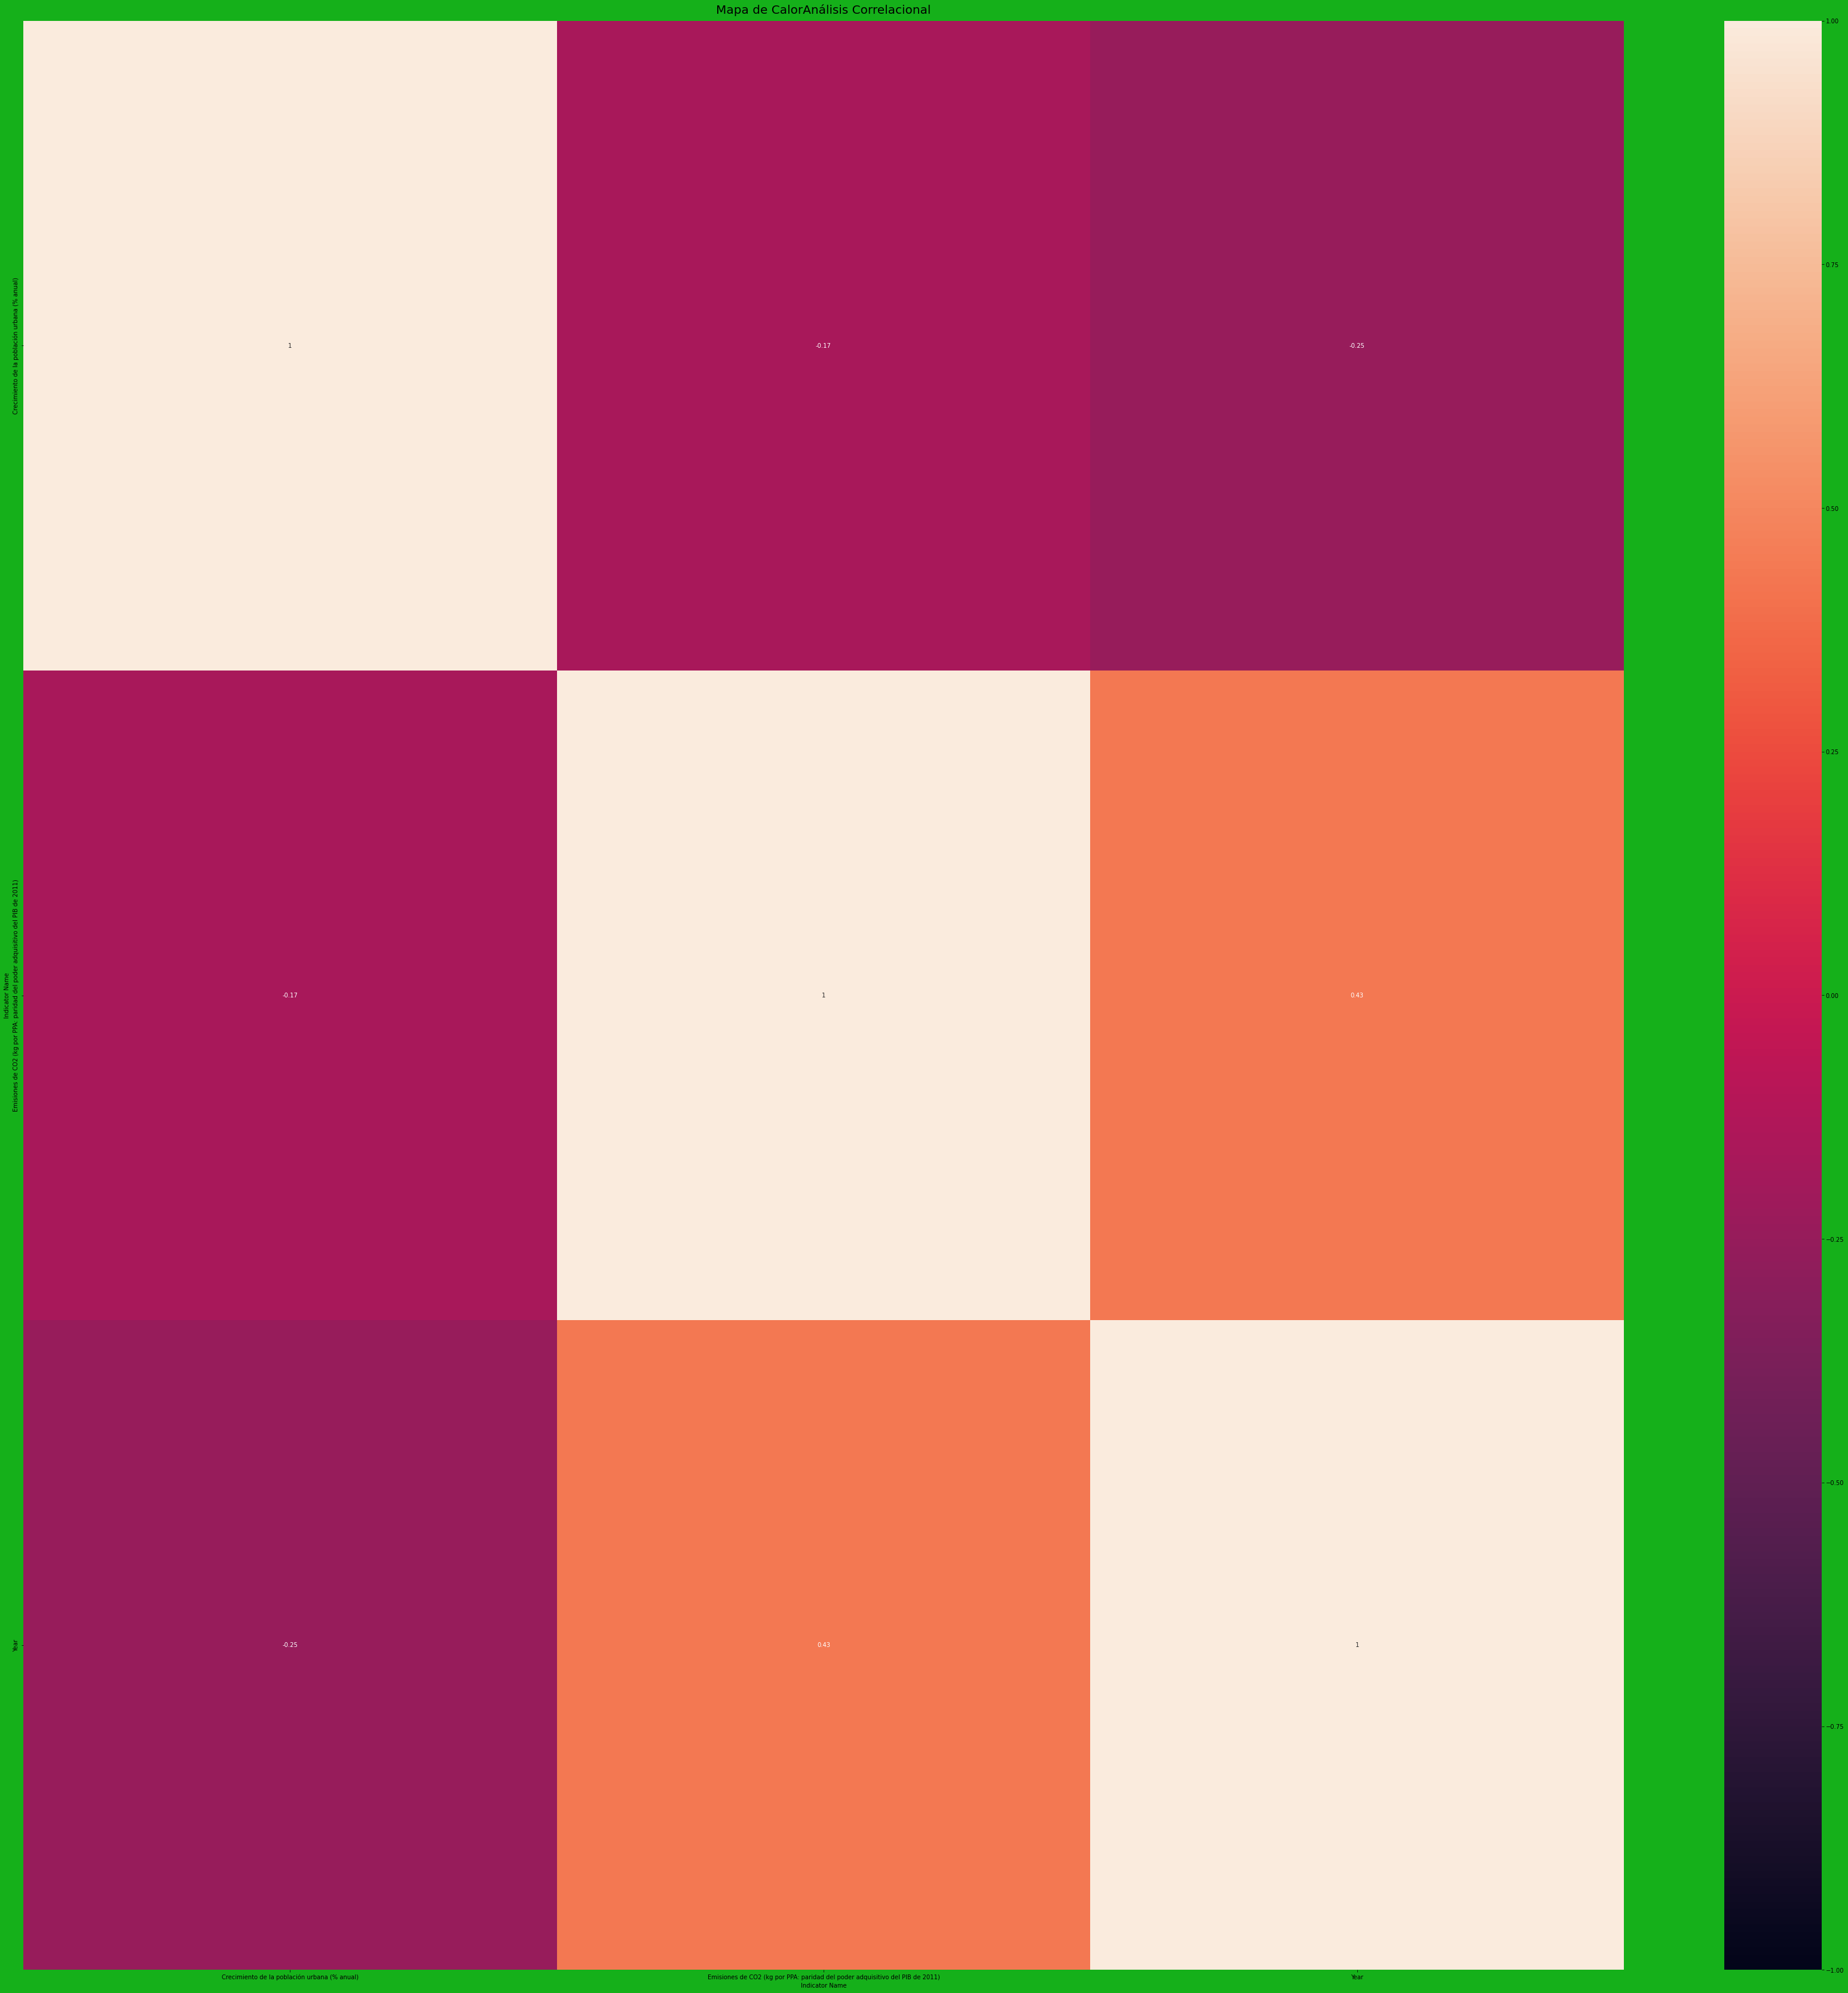

In [19]:
clima(Variable)

# **Determinar el K adecuado usando la técnica de análisis del codo o la técnica de la silueta**

In [20]:
X = np.array(dt[['Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011)']])
y = np.array(dt['Crecimiento de la población urbana (% anual)'])

In [21]:
def Elbow(i, j, k):
  kmeans = [KMeans(n_clusters=i) for i in range(i, j)]
  score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
  plt.plot(range(i, j),score)
  plt.xlabel(k)
  plt.ylabel('Score')
  plt.title('Técnica de análisis del codo')
  plt.grid()
  plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

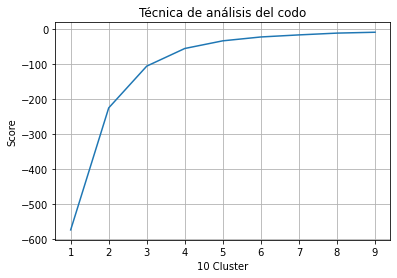

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


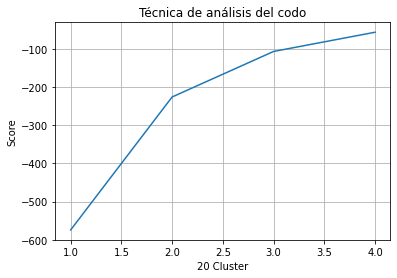

In [22]:
Elbow(1, 10 , "10 Cluster")
Elbow(1, 5 , "20 Cluster")

# Crear el modelo K-Means con el K adecuado.

In [23]:
#Metodo KMeans cluster
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(Variable)
labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Asignar los clusters de K-means al dataset original.

In [48]:
new_dfa = pd.DataFrame(data = Variable, columns = ['Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011)'])
new_dfa['label_kmeans'] = labels

# Describir los clusters usando boxplots y scatters con su respectiva interpretación.

**SCATTERS**

In [49]:
x = dt['Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011)']
y = dt['Year']

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


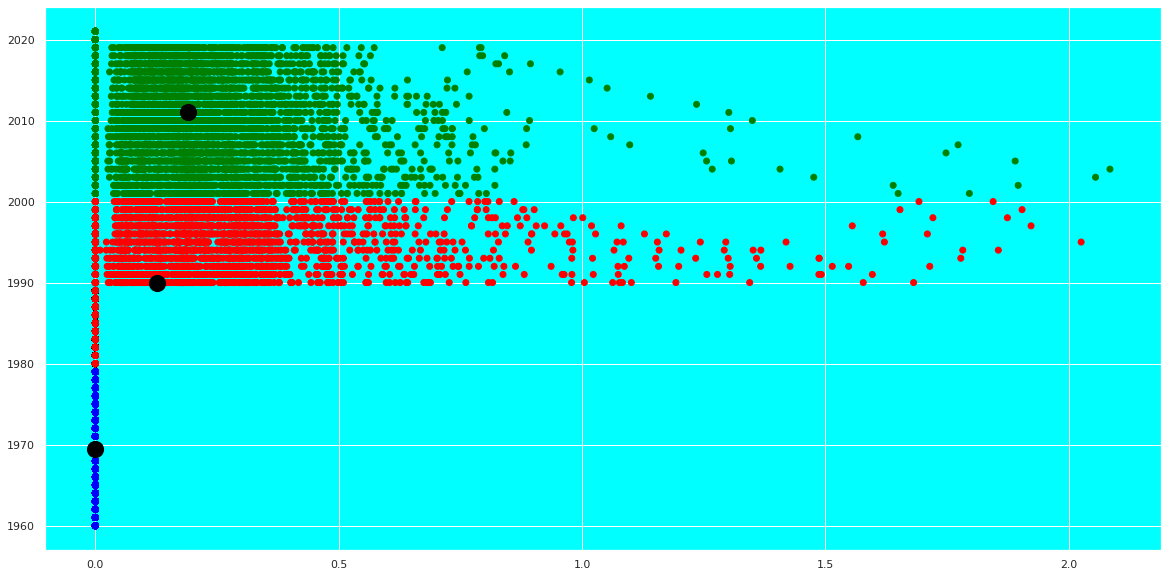

In [52]:
df = pd.DataFrame({'x': x, 'y': y})
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(df)
fig, ax = plt.subplots(figsize=(20, 10))

colors = np.array(['red', 'green', 'blue'])
ax.scatter(x, y, color=colors[labels])

ax.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, linewidths=3, color='black', zorder=10)

plt.show()


**Se puede visualizar que a través de los años la contaminación al clima ha ido en un aumento disparado puesto que entre el año 1960 a 1980 se mantenía estable esto de la contaminación, hasta el año 1990 que comienza a dispararse justo cuando iniciaba el crecimientos de fábricas u otros inventos fabricados, partierdo de los factores típicos de contaminación al clima. Es por eso que se provacan diferentes desastres naturales y el daño a la capa de ozono es cada vez más crítico**

1960          AxesSubplot(0.1,0.89465;0.235294x0.0053495)
1961     AxesSubplot(0.382353,0.89465;0.235294x0.0053495)
1962     AxesSubplot(0.664706,0.89465;0.235294x0.0053495)
1963         AxesSubplot(0.1,0.888231;0.235294x0.0053495)
1964    AxesSubplot(0.382353,0.888231;0.235294x0.0053495)
                              ...                        
2017         AxesSubplot(0.1,0.772682;0.235294x0.0053495)
2018    AxesSubplot(0.382353,0.772682;0.235294x0.0053495)
2019    AxesSubplot(0.664706,0.772682;0.235294x0.0053495)
2020         AxesSubplot(0.1,0.766262;0.235294x0.0053495)
2021    AxesSubplot(0.382353,0.766262;0.235294x0.0053495)
Length: 62, dtype: object

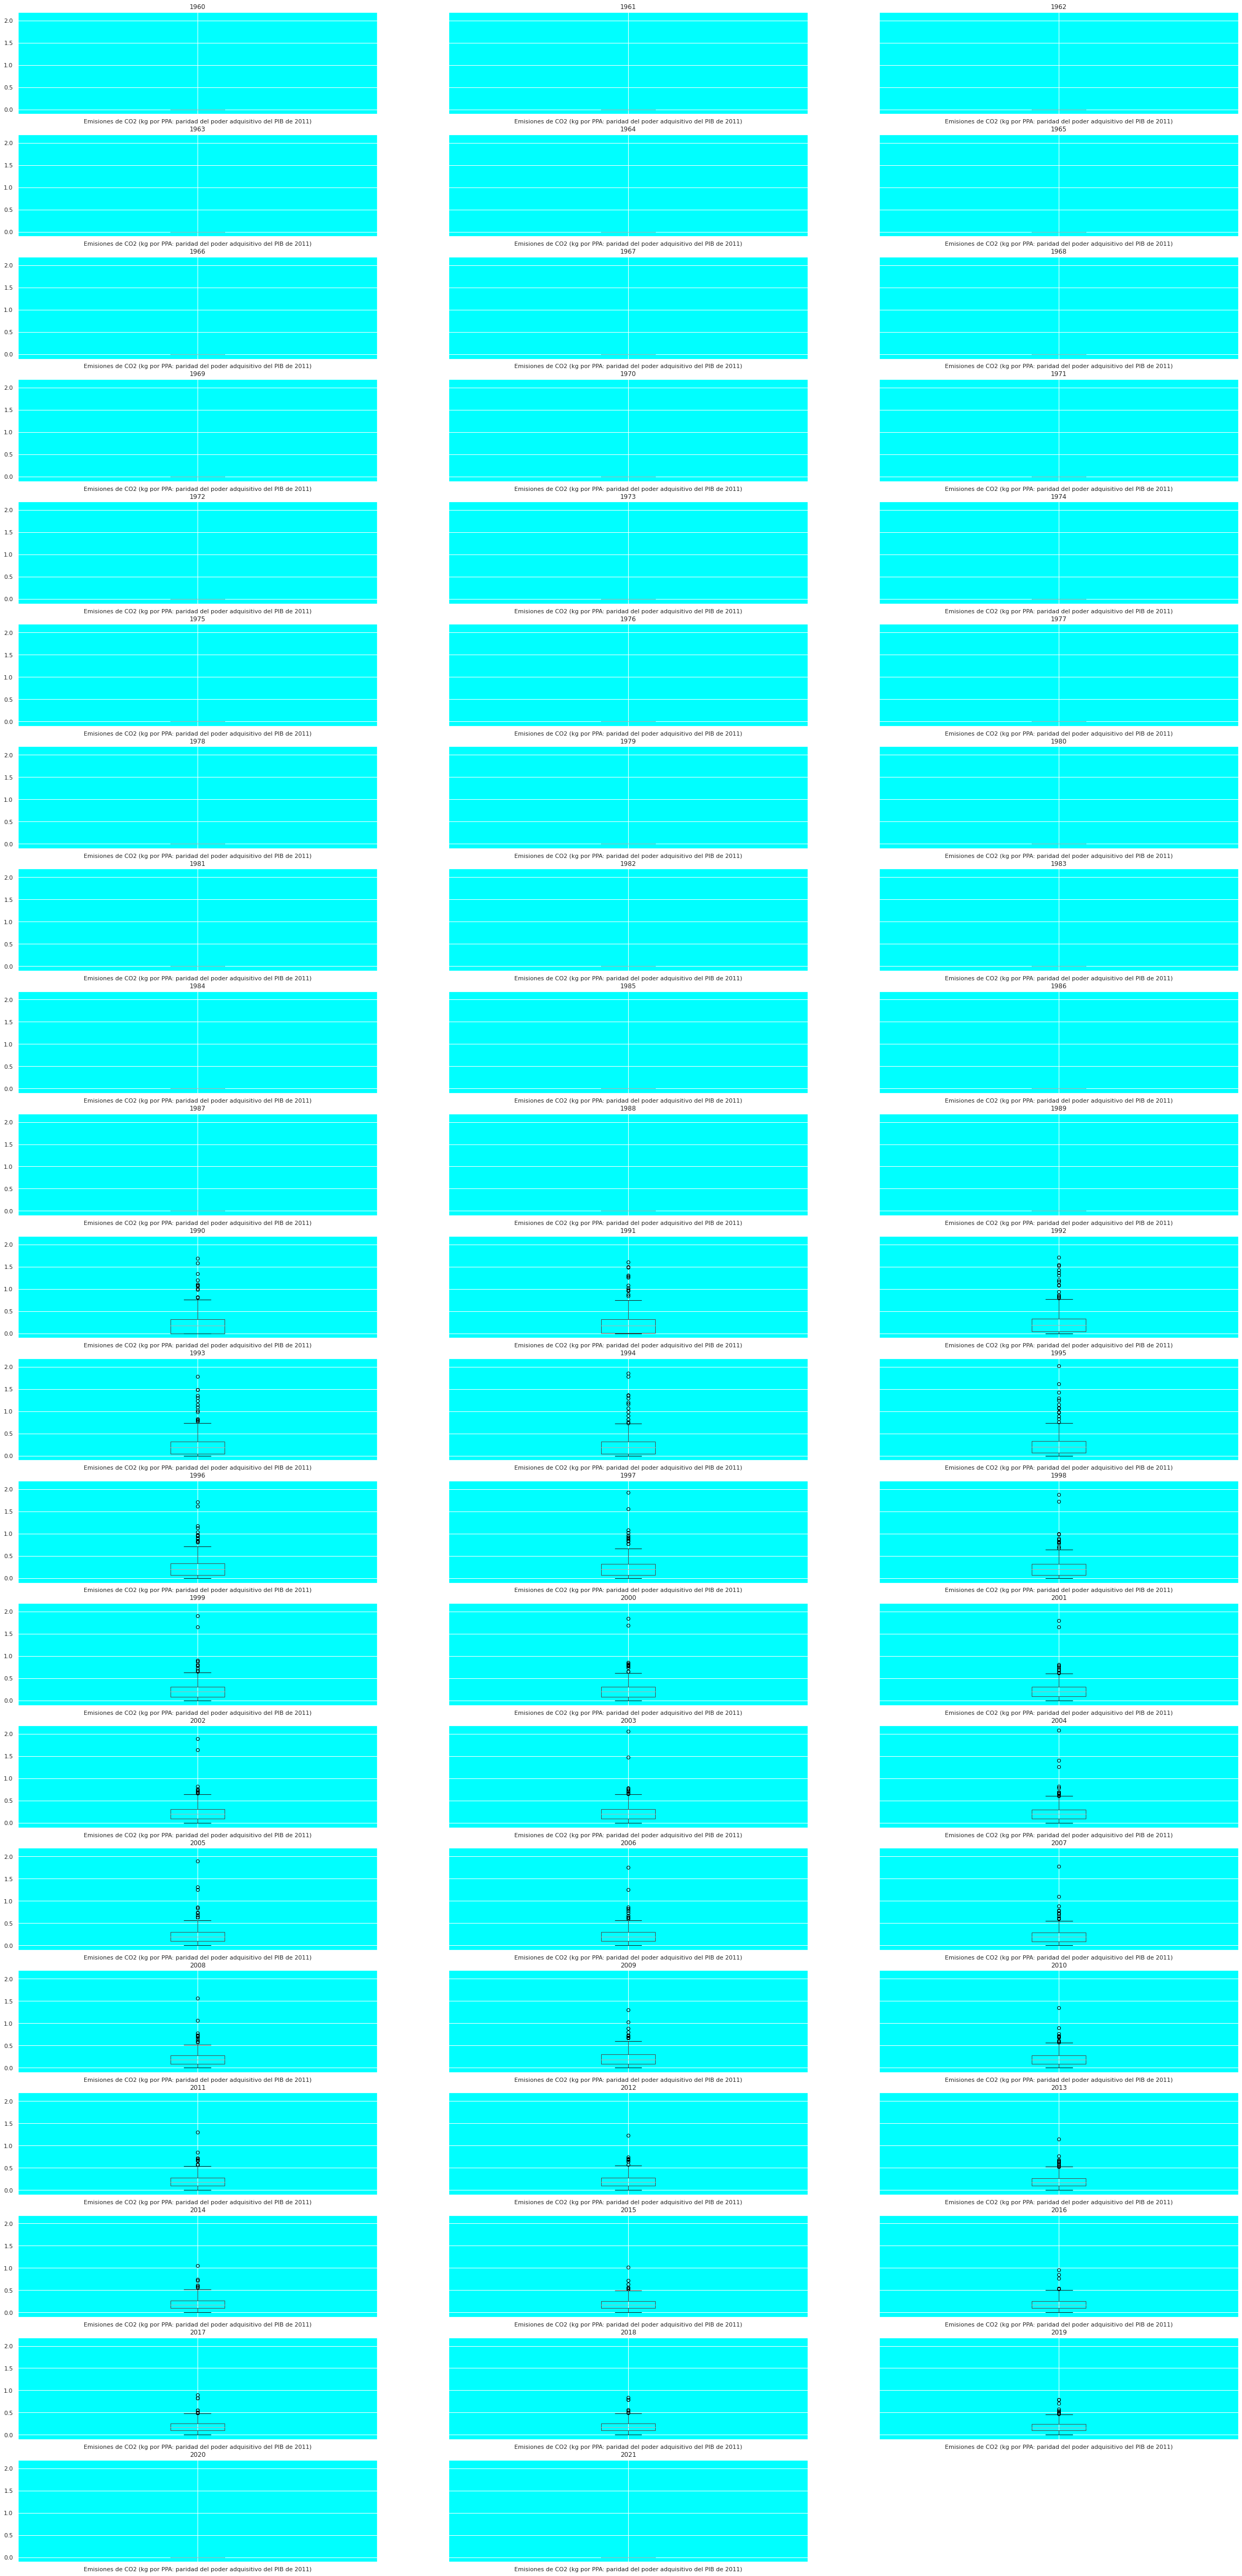

In [47]:
sns.set(rc={'axes.facecolor':'00FFFF'}) 
dt.groupby("Year").boxplot(column = 'Emisiones de CO2 (kg por PPA: paridad del poder adquisitivo del PIB de 2011)',figsize=(40,500),layout=(117,3))

# Conclusión Final

# En el presente análisis se indica en los gráficos bloxplots que durante el período 2015-2019, se ha observado un incremento continuo de los niveles de dióxido de carbono (CO2) y de otros importantes gases de efecto invernadero en la atmósfera estos gases generados por el mismo ser humano en un alto porcentaje, que han alcanzado niveles récords afectando al cambio climático de manera drástica, superior a los años anteriores. Esta claro que hay muy poca variabilidad para el año 2020 y 2021 y el problema en el clima se mantiene. En los gráficos de codos se puede observan tambien la tendencia de crecimiendo de gases que contaminan al ambiente afectando a la salud de las personas en todos los paises.En el scatter se puede analizar también el desgloce en aumento de los gases CO2 los cuales son los que hay que tener en cuenta porque pueden causar afecciones y son los causantes del efecto invernadero.

# ¿Qué medidas tomar?

- Utilizar transportes libres de emisiones como las bicicletas

- **Usar la energía de forma eficiente:** conectando y utilizando los dispositivos que necesitemos únicamente, de lo contrario mantenerlos desconectados de los tomacorrientes.

- **Aprovechar la vida útil de los productos:** utilizándolos y reciclando los materiales para evitar que estos sean desechados antes de tiempo.

- **No a la tala de bosques:** la deforestación emite más gases que todo el sector del transporte, por ello debemos trabajar para la recuperación de la vegetación.